In [5]:
import hyperspy.api as hs
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def load_dm4_data(filepath):
    s = hs.load(filepath)
    data = s.data  # The 3D data array
    return data

def analyze_pixel_peaks(dm4_file, x, y, prominence=0.05):
    # Load the data
    data = load_dm4_data(dm4_file)
    
    # Get the spectrum for the specified pixel
    spectrum = data[y, x, :]
    
    # Find peaks
    peaks, properties = find_peaks(spectrum, prominence=prominence)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot the full spectrum
    plt.plot(spectrum, label='Spectrum')
    
    # Plot the detected peaks
    plt.plot(peaks, spectrum[peaks], "x", color='red', label='Detected Peaks')
    
    plt.title(f'Spectrum and Peaks for Pixel ({x}, {y})')
    plt.xlabel('Spectrum Index')
    plt.ylabel('Intensity')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print peak information
    print(f"Peaks found at indices: {peaks}")
    print(f"Peak intensities: {spectrum[peaks]}")
    
    return spectrum, peaks, spectrum[peaks]

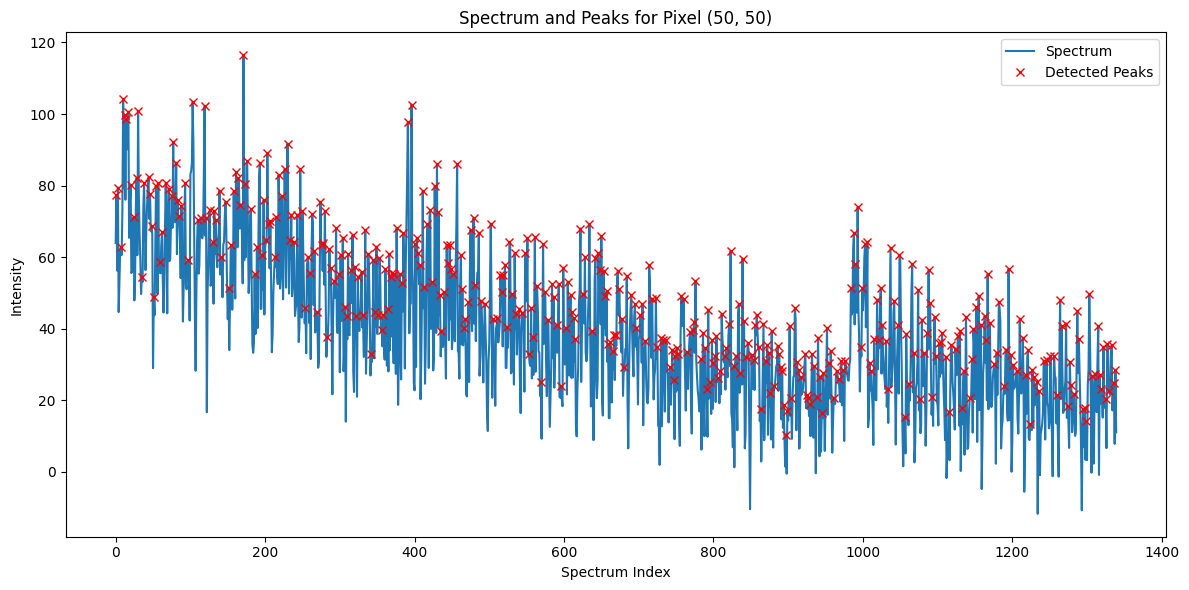

Peaks found at indices: [   1    3    7   10   12   14   17   20   24   28   30   35   38   44
   46   48   51   54   57   59   62   67   71   75   77   81   83   85
   88   93   97  103  110  114  119  121  126  130  132  134  139  141
  147  151  155  158  161  164  167  171  173  176  181  186  189  193
  196  198  201  203  205  207  213  215  218  222  226  230  233  235
  238  243  247  250  254  257  260  263  266  269  274  276  278  280
  283  286  288  292  295  299  301  304  307  309  311  315  317  320
  322  324  329  331  334  338  342  345  347  349  351  353  356  358
  361  364  366  368  370  373  376  380  383  385  391  396  401  403
  405  407  411  413  417  421  424  427  430  432  434  436  440  443
  445  447  449  452  457  462  464  466  468  472  475  479  481  486
  489  494  502  505  511  515  517  519  521  524  527  531  534  536
  540  544  548  551  553  556  558  561  564  569  572  574  578  584
  586  590  593  596  599  603  605  609  611  613  6

In [6]:
# Usage
dm4_file = 'data/images_3D/BFO_a-0090 (dark ref corrected).dm3'
x, y = 50, 50  # Coordinates of the pixel to analyze
prominence = 0.05  # Adjust this value as needed

spectrum, peak_indices, peak_intensities = analyze_pixel_peaks(dm4_file, x, y, prominence)

# If you want to print the full spectrum
print("Full spectrum:")
print(spectrum)

In [18]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_dm4_highres(dm4_file, energy_idx=None):
    # Load the data
    data = load_dm4_data(dm4_file)
    
    # Print information about the dataset
    print(f"Data shape: {data.shape}")
    
    # Check if it's a 3D dataset
    if len(data.shape) == 3:
        height, width, spectrum_length = data.shape
    elif len(data.shape) == 2:
        height, width = data.shape
        spectrum_length = 1
    else:
        raise ValueError(f"Unexpected data shape: {data.shape}")
    
    # If energy_idx is not provided, use the middle of the spectrum
    if energy_idx is None:
        energy_idx = spectrum_length // 2
    
    # Extract the 2D slice at the specified energy
    if spectrum_length > 1:
        image_2d = data[:, :, energy_idx]
    else:
        image_2d = data
    
    # Create the heatmap
    fig = go.Figure(data=go.Heatmap(
        z=image_2d,
        colorscale='Viridis',
        zmin=np.min(image_2d),
        zmax=np.max(image_2d)
    ))
    
    # Update the layout
    fig.update_layout(
        title=f'DM4 File Visualization' + (f' (Energy Index: {energy_idx})' if spectrum_length > 1 else ''),
        xaxis_title='X',
        yaxis_title='Y',
        width=1000,
        height=1000
    )
    
    # Add hover information
    fig.update_traces(
        hovertemplate='X: %{x}<br>Y: %{y}<br>Intensity: %{z:.2f}<extra></extra>'
    )
    
    # Adjust axes to match the data dimensions
    fig.update_xaxes(range=[0, width])
    fig.update_yaxes(range=[0, height])
    
    # Show the plot
    fig.show()
    
    return fig, data

In [20]:
fig, data = plot_dm4_highres(dm4_file, energy_idx=920)

# Optional: Print some information about the dataset
print(f"Data shape: {data.shape}")
if len(data.shape) == 3:
    print(f"Number of energy channels: {data.shape[2]}")

Data shape: (210, 210, 1340)


Data shape: (210, 210, 1340)
Number of energy channels: 1340


In [2]:
import hyperspy.api as hs
import matplotlib.pyplot as plt

def load_and_plot_dm4(file_path):
    # Load the data
    s = hs.load(file_path)
    return s

def get_spectrum_at_pixel(s, x, y):
    # Extract the spectrum at the specified pixel
    spectrum = s.inav[x, y].data
    
    # Get the energy axis
    energy_axis = s.axes_manager[-1].axis
    
    # Plot the spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(energy_axis, spectrum)
    plt.title(f'Spectrum at pixel ({x}, {y})')
    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity')
    plt.show()
    
    return spectrum

# Usage
s = load_and_plot_dm4(dm4_file)
# After exploring interactively, you can get the spectrum for a specific pixel:
x, y = 63, 91  # Replace with the coordinates of your pixel of interest
spectrum = get_spectrum_at_pixel(s, x, y)

NameError: name 'dm4_file' is not defined

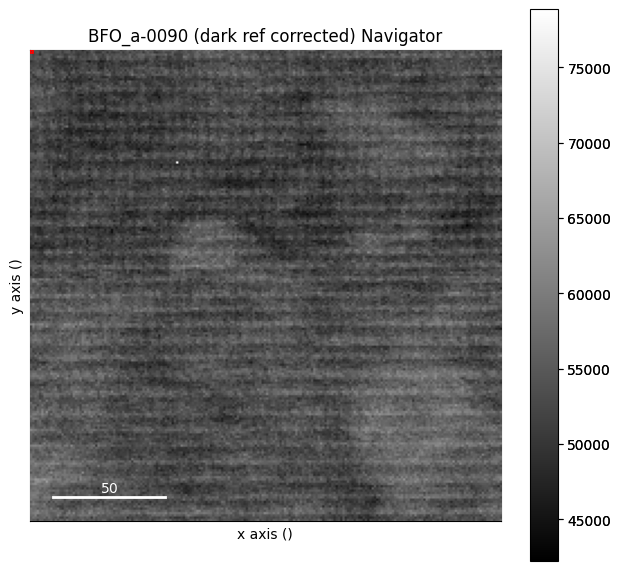

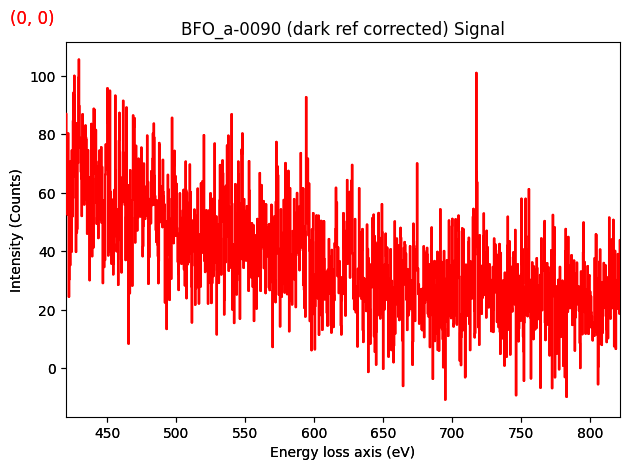

In [5]:
dm4_file = 'data/images_3D/BFO_a-0090 (dark ref corrected).dm3'


s = hs.load(dm4_file)

s.plot()

